In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('./Knn_data.csv')
print("The shape of the data set is :- ", df.shape)

df.head()

The shape of the data set is :-  (1000, 12)


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
# We will be required to predict the custcat which is classified as 1, 2, 3, 4. counting the occurence of all of them
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

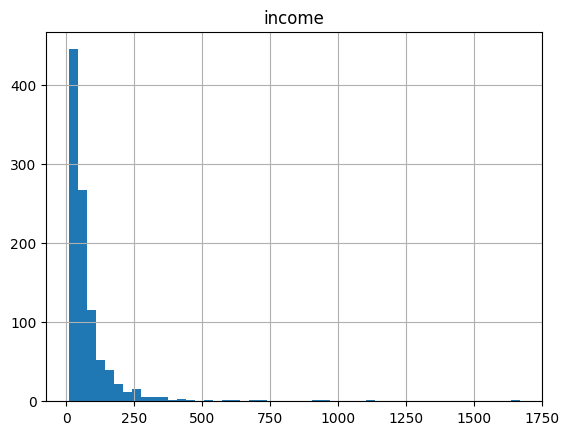

In [6]:
df.hist(column='income', bins=50)

In [7]:
# The columns present in the current dataset is
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [14]:
# Now taking the cuscat values
Y = df['custcat'].values
Y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [15]:
# Now normalizing this data
norm_data = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
norm_data[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [18]:
# Splitting the train and test data
X_train, X_test, Y_train, Y_test = train_test_split(norm_data, Y, test_size=0.2, random_state=4)
print("The test set is :- ", X_test.shape, Y_test.shape)

print("The train set is :- ", X_train.shape, Y_train.shape)


The test set is :-  (200, 11) (200,)
The train set is :-  (800, 11) (800,)


In [19]:
# Classification with the help of K-Nearest Neighbour
k = 4
neighbour = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
neighbour

KNeighborsClassifier(n_neighbors=4)

In [20]:
# Predicting to get answers for xtest value
yhat = neighbour.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [22]:
# Predicting the accuracy of the model
print("Train Set Accuracy :- ", metrics.accuracy_score(Y_train, neighbour.predict(X_train)))
print("Test Set Accuray :- ", metrics.accuracy_score(Y_test, yhat))

Train Set Accuracy :-  0.5475
Test Set Accuray :-  0.32


In [23]:
k = 6
neighbour = KNeighborsClassifier(n_neighbors=k).fit(X_train, Y_train)
y_hat = neighbour.predict(X_test)
y_hat[0:5]

array([3, 3, 3, 4, 4], dtype=int64)

In [24]:
# Now checking the train and test accuracy of the model
print("Train Set Accuray :- ", metrics.accuracy_score(Y_train, neighbour.predict(X_train)))
print("Test Set Accuracy :- ", metrics.accuracy_score(Y_test, y_hat))

Train Set Accuray :-  0.51625
Test Set Accuracy :-  0.31


In [26]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for n in range(1, ks):
    neighbour = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train)
    yhat = neighbour.predict(X_test)
    mean_acc[n-1] = np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc


array([0.0324037 , 0.03208582, 0.03284623, 0.03298485, 0.03284623,
       0.03270321, 0.03337477, 0.0331191 , 0.03349627])

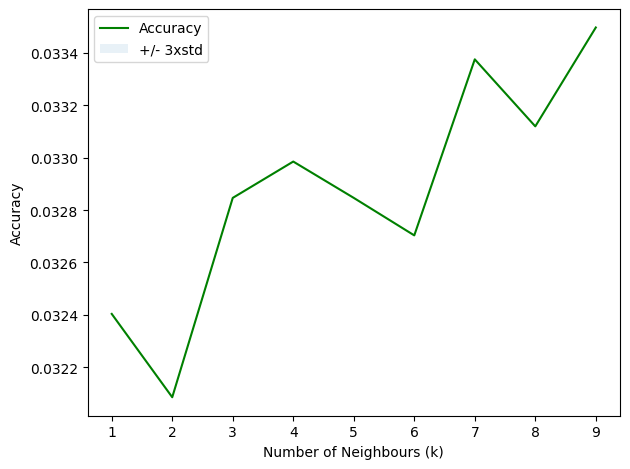

In [28]:
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc-1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy' , '+/- 3xstd'))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbours (k)")
plt.tight_layout()
plt.show()

In [29]:
print("The best accuracy was with ", mean_acc.max(), " with k=", mean_acc.argmax()+1)

The best accuracy was with  0.03349626844888845  with k= 9
